In [1]:
#Experiments for neural networks with produced data while studying Machine Learining Techniques
#Training of oscillation with analytic solution, amplitude vs frequency
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [2]:
def Amplitude(omega, zeta): 
    """Analytic result"""
    A = 1/math.sqrt((1-omega**2)**2+(2*zeta*omega)**2)
    return A

In [3]:
zeta_0 = 0.1   # Damping ratio
w_min = 0.0    # Start frequency
w_max = 10.0   # End frequency
N_omega = 300  #points    

w = np.linspace(w_min, w_max, N_omega).reshape(-1, 1)
Amplitude = np.vectorize(Amplitude)
a = Amplitude(w, zeta_0)

rnd_indices = np.random.rand(len(w)) < 0.8

x_train = w[rnd_indices]
y_train = a[rnd_indices]
x_test = w[~rnd_indices]
y_test = a[~rnd_indices]

In [4]:
def baseline_model():
    height = 100
    model = Sequential()    
    model.add(Dense(height, input_dim=1, activation='tanh', kernel_initializer='uniform'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='uniform'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='uniform'))
    model.add(Dense(1, input_dim=height, activation='linear', kernel_initializer='uniform'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mse', optimizer=sgd)
    return model

# Training the model
model = baseline_model()
model.fit(x_train, y_train, epochs=1000, verbose = 0)

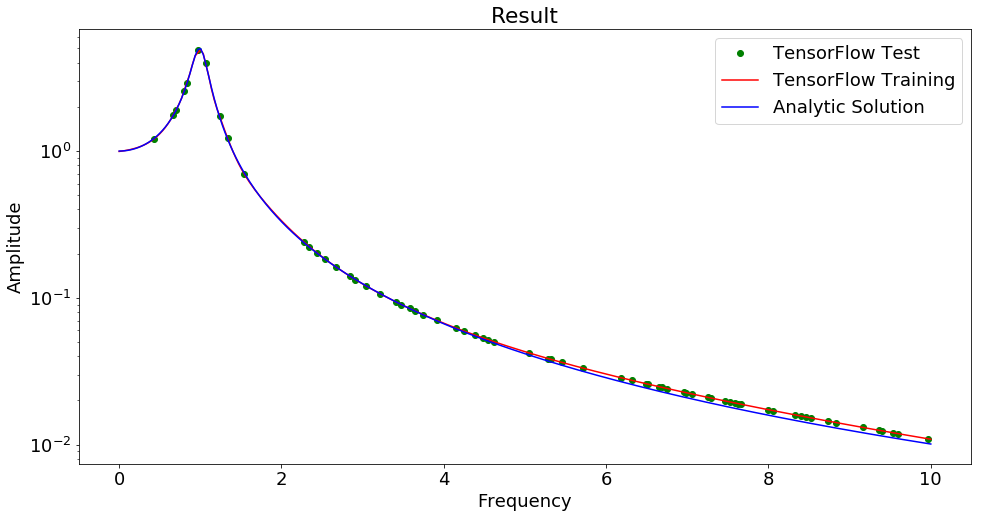

In [5]:
plt.figure(figsize=(16,8))
plt.rcParams["font.size"] = "18"

plt.semilogy(x_test, model.predict(x_test), 'og')
plt.semilogy(x_train, model.predict(x_train), 'r')
plt.semilogy(w, a, 'b')

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Result')
plt.legend(['TensorFlow Test', 'TensorFlow Training', 'Analytic Solution'])
plt.show()